In [1]:
# Datensatz mit pandas einlesen
import pandas as pd

data = pd.read_csv('../src/data/interim/penguins.csv')

In [2]:
# 5 zufällige Zeilen als Beispiel anzeigen
data.sample(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,female,2007
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
331,Chinstrap,Dream,52.2,18.8,197.0,3450.0,male,2009
231,Gentoo,Biscoe,45.2,16.4,223.0,5950.0,male,2008
304,Chinstrap,Dream,46.4,17.8,191.0,3700.0,female,2008


## Mit fehlenden Werten umgehen

In [3]:
# Stelle fest, welche Werte in der Tabelle NaNs (=leer) sind
data.isna()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
339,False,False,False,False,False,False,False,False
340,False,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False,False


In [4]:
# Zähle pro Spalte zusammen, wie viele Werte leer sind
data.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [5]:
# Wenn wir alle Zeilen, die leere Werte enthalten, entfernen, wie viel Prozent der Tabelle sind noch übrig?

# Teile die Länge der Tabelle, aus der Zeilen mit leeren Werten entfernt wurden,
# durch die Länge der Tabelle, in der alle Zeilen enthalten sind

len(data.dropna())/len(data)

0.9680232558139535

In [6]:
# Entferne alle Zeilen der Tabelle, die leere Werte enthalten
data = data.dropna()

## Duplikate entfernen

In [7]:
# Zeige für jede Zeile, ob diese das Duplikat einer anderen Zeile ist
data.duplicated()

0      False
1      False
2      False
4      False
5      False
       ...  
339    False
340    False
341    False
342    False
343    False
Length: 333, dtype: bool

In [8]:
# Zeige nur Zeilen, die Duplikate anderer Zeilen sind
data[data.duplicated()==True]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year


In [9]:
# Entferne Zeilen, die Duplikate anderer Zeilen sind

print('Zeilen vor Duplikatentfernung: ', len(data))

data = data[data.duplicated()==False]

print('Zeilen nach Duplikatentfernung: ', len(data))

Zeilen vor Duplikatentfernung:  333
Zeilen nach Duplikatentfernung:  333


In [10]:
list(data.columns)

['species',
 'island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex',
 'year']

In [11]:
data.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [12]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [13]:
data['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [14]:
data['island_scale']= data['island']

data['island_scale'] = data['island_scale'].replace('Torgersen',0)
data['island_scale'] = data['island_scale'].replace('Biscoe',1)
data['island_scale'] = data['island_scale'].replace('Dream',2)
data['sex'].unique()

array(['male', 'female'], dtype=object)

In [15]:
data['sex_scale']= data['sex']

data['sex_scale'] = data['sex_scale'].replace('male',0)
data['sex_scale'] = data['sex_scale'].replace('female',1)
data.sample(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,island_scale,sex_scale
65,Adelie,Biscoe,41.6,18.0,192.0,3950.0,male,2008,1,0
159,Gentoo,Biscoe,46.7,15.3,219.0,5200.0,male,2007,1,0
84,Adelie,Dream,37.3,17.8,191.0,3350.0,female,2008,2,1
238,Gentoo,Biscoe,43.4,14.4,218.0,4600.0,female,2009,1,1
298,Chinstrap,Dream,43.2,16.6,187.0,2900.0,female,2007,2,1


In [16]:
# Berechne Korrelationsmatrix
corr = data.corr()
corr.round(2)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,island_scale,sex_scale
bill_length_mm,1.00,-0.23,0.65,0.59,0.03,0.21,-0.34
bill_depth_mm,-0.23,1.00,-0.58,-0.47,-0.05,0.19,-0.37
flipper_length_mm,0.65,-0.58,1.00,0.87,0.15,-0.16,-0.26
body_mass_g,0.59,-0.47,0.87,1.00,0.02,-0.20,-0.42
year,0.03,-0.05,0.15,0.02,1.00,-0.03,0.00
island_scale,0.21,0.19,-0.16,-0.20,-0.03,1.00,-0.01
sex_scale,-0.34,-0.37,-0.26,-0.42,0.00,-0.01,1.00


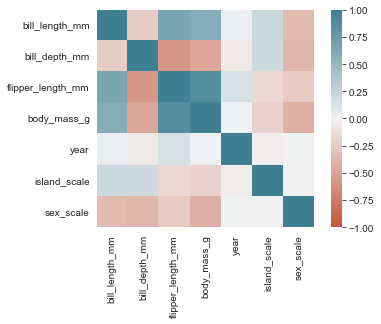

In [17]:
# Mache einen Plot der Korrelationsmatrix
import seaborn as sns

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

<AxesSubplot:xlabel='bill_length_mm', ylabel='flipper_length_mm'>

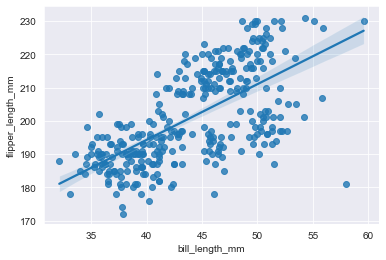

In [18]:
# Plotte eine lineare Regression zwischen age und work scale
sns.regplot(data=data, x='bill_length_mm', y='flipper_length_mm')

<AxesSubplot:xlabel='bill_length_mm', ylabel='flipper_length_mm_cat'>

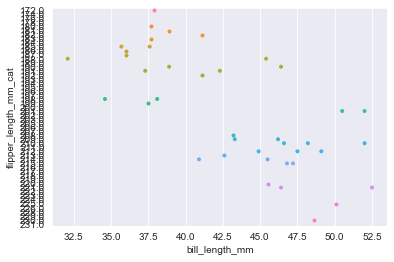

In [24]:
# Plotte einen Swarmplot
df_tmp = data.copy()
df_tmp['flipper_length_mm_cat'] = df_tmp['flipper_length_mm'].astype('category')
sns.swarmplot(data=df_tmp.sample(40),
              x='bill_length_mm',
              y='flipper_length_mm_cat',
              size=4)

C:\Users\Lukas\anaconda3\envs\biz_analytics_a\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='bill_depth_mm', ylabel='flipper_length_mm_cat'>

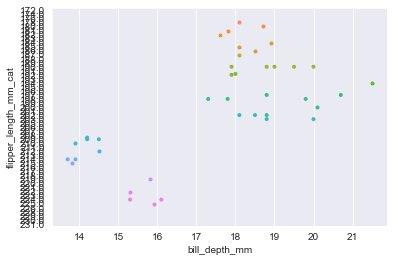

In [28]:
# Plotte einen Swarmplot
df_tmp = data.copy()
df_tmp['flipper_length_mm_cat'] = df_tmp['flipper_length_mm'].astype('category')
sns.swarmplot(data=df_tmp.sample(40),
              x='bill_depth_mm',
              y='flipper_length_mm_cat',
              size=4)

## Clustern mit k-Means

In [29]:
# Daten skalieren
from sklearn import preprocessing
cols_to_delete = ['species','island','sex']
data_scale = data.drop(columns=cols_to_delete)

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(data_scale)

X

array([[-0.89604189,  0.7807321 , -1.42675157, ..., -1.28374201,
        -1.8140371 , -0.99103121],
       [-0.82278787,  0.11958397, -1.06947358, ..., -1.28374201,
        -1.8140371 ,  1.00904996],
       [-0.67627982,  0.42472926, -0.42637319, ..., -1.28374201,
        -1.8140371 ,  1.00904996],
       ...,
       [ 1.02687621,  0.52644436, -0.56928439, ...,  1.18015476,
         1.13987173, -0.99103121],
       [ 1.24663828,  0.93330475,  0.64546078, ...,  1.18015476,
         1.13987173, -0.99103121],
       [ 1.13675725,  0.7807321 , -0.2120064 , ...,  1.18015476,
         1.13987173,  1.00904996]])

In [30]:
# Pandas DataFrame aus NumPy-Array erstellen und ausgeben
data_scaled = pd.DataFrame(X, index=data_scale.index, columns=data_scale.columns)
data_scaled

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,island_scale,sex_scale
0,-0.896042,0.780732,-1.426752,-0.568475,-1.283742,-1.814037,-0.991031
1,-0.822788,0.119584,-1.069474,-0.506286,-1.283742,-1.814037,1.009050
2,-0.676280,0.424729,-0.426373,-1.190361,-1.283742,-1.814037,1.009050
4,-1.335566,1.085877,-0.569284,-0.941606,-1.283742,-1.814037,1.009050
5,-0.859415,1.747026,-0.783651,-0.692852,-1.283742,-1.814037,-0.991031
...,...,...,...,...,...,...,...
339,2.162314,1.340165,0.431094,-0.257532,1.180155,1.139872,-0.991031
340,-0.090248,0.475587,0.073816,-1.003795,1.180155,1.139872,1.009050
341,1.026876,0.526444,-0.569284,-0.537380,1.180155,1.139872,-0.991031
342,1.246638,0.933305,0.645461,-0.133155,1.180155,1.139872,-0.991031


In [31]:
# NumPy-Array aus Pandas DataFrame erstellen und ausgeben
data_scaled_numpy = data_scaled.values
data_scaled_numpy

array([[-0.89604189,  0.7807321 , -1.42675157, ..., -1.28374201,
        -1.8140371 , -0.99103121],
       [-0.82278787,  0.11958397, -1.06947358, ..., -1.28374201,
        -1.8140371 ,  1.00904996],
       [-0.67627982,  0.42472926, -0.42637319, ..., -1.28374201,
        -1.8140371 ,  1.00904996],
       ...,
       [ 1.02687621,  0.52644436, -0.56928439, ...,  1.18015476,
         1.13987173, -0.99103121],
       [ 1.24663828,  0.93330475,  0.64546078, ...,  1.18015476,
         1.13987173, -0.99103121],
       [ 1.13675725,  0.7807321 , -0.2120064 , ...,  1.18015476,
         1.13987173,  1.00904996]])

In [32]:
# Datentyp einer Variable überprüfen
type(data_scaled_numpy)

numpy.ndarray

In [33]:
# Daten clustern
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(X)

KMeans(n_clusters=3)

In [34]:
# Inspiziere die den Datenpunkten zugeordneten Cluster
predictions = model.labels_
predictions

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [35]:
# Füge das Cluster als Spalte zum Datensatz hinzu
data_with_predictions = data.copy()
data_with_predictions['cluster'] = predictions
data_with_predictions

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,island_scale,sex_scale,cluster
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,0,0,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,0,1,2
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,0,1,2
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,0,1,2
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,2,0,0
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,2,1,0
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,2,0,0
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,2,0,0


## Cluster analysieren

In [36]:
# Seaborn initialisieren
sns.set()

<AxesSubplot:xlabel='bill_length_mm', ylabel='species'>

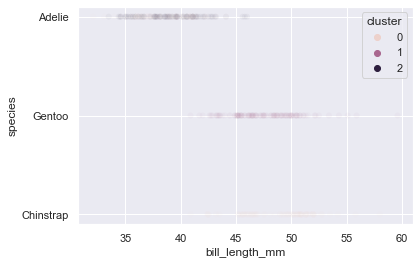

In [37]:
# XY-Plot von Alter und Gehalt plotten
sns.scatterplot(data=data_with_predictions,
                x='bill_length_mm',
                y='species',
                alpha=0.04,
                hue='cluster')

In [84]:
# Spaltendurchschnitte pro Cluster ausgeben
data_with_predictions.groupby('cluster').mean()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_scale,island_scale,sex_scale
cluster,,,,,,,,
0,47.568067,14.996639,217.235294,5092.436975,2008.067227,1.0,1.000000,0.487395
1,48.833824,18.420588,195.823529,3733.088235,2007.970588,2.0,2.000000,0.500000
2,38.823973,18.347260,190.102740,3706.164384,2008.054795,0.0,1.054795,0.500000


In [31]:
from matplotlib import pyplot as plt

<AxesSubplot:>

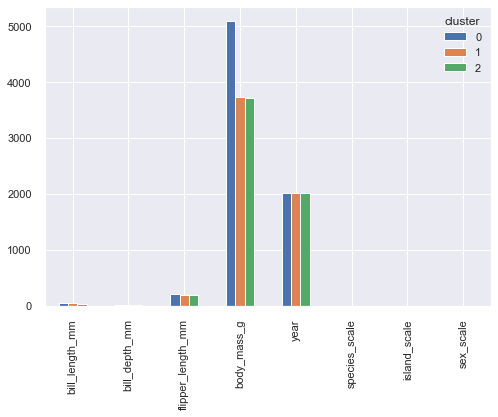

In [85]:
# Spaltendurchschnitte pro Cluster plotten
data_with_predictions.groupby('cluster').mean().T.plot.bar()

In [38]:
# Cluster-Spalte zu skalierten Daten hinzufügen
data_scaled_with_predictions = data_scaled.copy()
data_scaled_with_predictions['cluster'] = predictions

<AxesSubplot:>

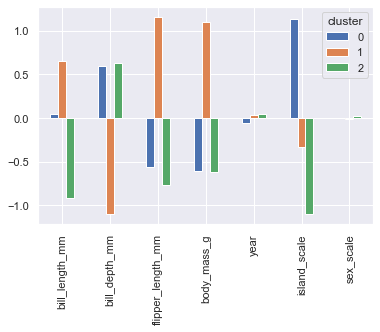

In [39]:
# Skalierte Spaltendurchschnitte pro Cluster plotten
data_scaled_with_predictions.groupby('cluster').mean().T.plot.bar()

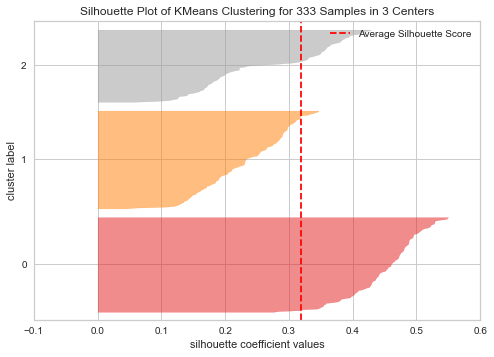

In [40]:
# Erstelle Silhouette-Plots für mehrere Clusterkonfigurationen
from yellowbrick.cluster.silhouette import SilhouetteVisualizer
from matplotlib import pyplot as plt

sil = SilhouetteVisualizer(KMeans(n_clusters=3, random_state=42))
sil.fit(X)
sil.finalize()
plt.show()

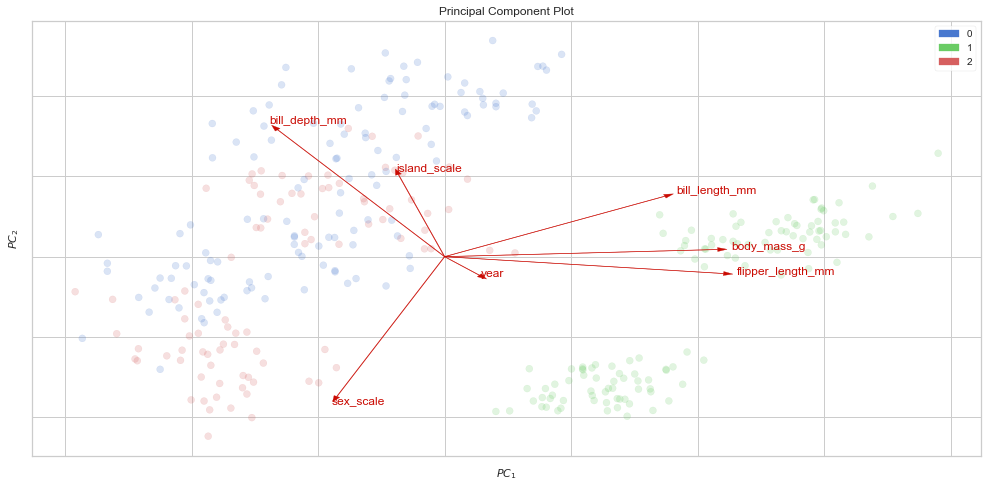

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [41]:
# Plotte die Principal Components des Datensatzes
from yellowbrick.features import PCA

classes = ['0', '1', '2']

visualizer = PCA(classes=classes,
                 proj_features=True,
                 alpha=0.2,
                 colormap='sns_muted',
                 size=(1000,500))

visualizer.fit_transform(data_scaled, predictions)
visualizer.show()

In [43]:
# PCA mit Scikit-learn durchführen
from sklearn.decomposition import PCA

pca = PCA(n_components=7)
pca_fit = pca.fit(data_scaled)

<AxesSubplot:label='e87dd107-85b7-4520-b2fd-83f7ea705af6'>

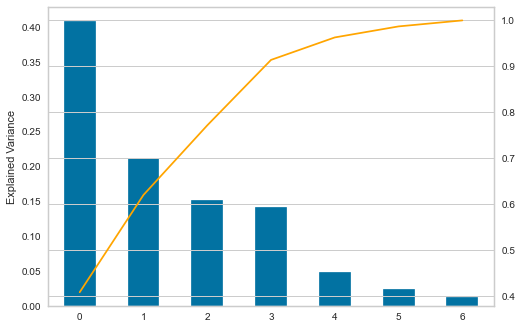

In [44]:
# Scree-Plot mit Pareto-Plot ausgeben
pd.Series(pca.explained_variance_ratio_)\
    .plot.bar(ylabel='Explained Variance')
pd.Series(pca.explained_variance_ratio_).cumsum()\
    .plot.line(ylabel='Explained Variance',
               secondary_y=True,
               color='orange')

## Klassifizierung

In [45]:
# Nearest-Neighbor-Modell trainieren
# (an die Daten anpassen)
from sklearn.neighbors import KNeighborsClassifier

labels = data['species']

model = KNeighborsClassifier()
model.fit(data_scaled, labels)

KNeighborsClassifier()

In [46]:
# Wähle zufällig ein paar Zeilen aus,
# die das Modell vorhersagen soll
data_to_predict = data_scaled.sample(5)
data_to_predict

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,island_scale,sex_scale
6,-0.932669,0.323014,-1.426752,-0.723946,-1.283742,-1.814037,1.009050
72,-0.804474,0.017869,-0.354918,-0.817229,-0.051794,-1.814037,1.009050
0,-0.896042,0.780732,-1.426752,-0.568475,-1.283742,-1.814037,-0.991031
197,-0.071934,-1.660430,1.145650,0.861863,-0.051794,-0.337083,1.009050
158,0.257709,-1.304427,0.716916,0.737486,-1.283742,-0.337083,1.009050


In [105]:
# Wähle für genau jene Zeilen die Antwort
labels_to_predict = labels[data_to_predict.index]
labels_to_predict

96        Adelie
298    Chinstrap
82        Adelie
48        Adelie
138       Adelie
Name: species, dtype: object

In [47]:
# Mit dem Modell die gewählten Zeilen vorhersagen
model.predict(data_to_predict)

array(['Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo'], dtype=object)

In [48]:
# Sage alle bereits bekannten Beobachtungen voraus
all_predictions = model.predict(data_scaled)

In [49]:
# Werte aus, wie viele Vorhersagen stimmen
correct_predictions = all_predictions==labels
correct_predictions.value_counts(normalize=True)

True     0.993994
False    0.006006
Name: species, dtype: float64

In [51]:
data_with_predictions

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,island_scale,sex_scale,cluster
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,0,0,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,0,1,2
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,0,1,2
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,0,1,2
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,2,0,0
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,2,1,0
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,2,0,0
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,2,0,0
